# Chapter02 线性回归
## 2.1 最小二乘法
- $N$ 为正整数，对于给定的数对 $(x_{1},y_{1}),\cdots, (x_{N},y_{N})\in \mathbb{R}\times \mathbb{R}$，可以通过最小二乘法得出一个截距 $\beta_{0}$ 和斜率 $\beta_{1}$
- 最小二乘的**中心思想**
$$
\min L = \sum_{i=1}^{N}(y_{i} - \beta_{0} - \beta_{1}x_{i})^{2} = \Vert \boldsymbol{y} - \boldsymbol{X}\hat{\boldsymbol{\beta}} \Vert^{2}
$$

### 求法 
- 逐个求偏导
$$
\begin{array}{cc}
  \begin{cases}
    \displaystyle \frac{\partial{L}}{\partial{\beta_{0}}} =-2 \sum_{i=1}^{N}(y_{i} - \beta_{0} - \beta_{1}x_{i})= 0	\\
    \displaystyle \frac{\partial{L}}{\partial{\beta_{1}}} =-2 \sum_{i=1}^{N}x_{i}(y_{i} - \beta_{0} - \beta_{1}x_{i})= 0	\\
  \end{cases} 
  \\\\ \big\Downarrow \\\\
  \begin{cases}
    \displaystyle	\bar{y} - \beta_{0} - \beta_{1}\bar{x} = 0 & (1)\\
    \displaystyle	\sum_{i=1}^{N}x_{i}y_{i} - \beta_{0}\bar{x} - \beta_{1}\sum_{i=1}^{N}x_{i}^{2} = 0 & (2)\\
  \end{cases}\xrightarrow{(2)-\bar{x}(1)} \displaystyle \text{Cov}(x,y)-\beta_{1}D(x) =0
  \\\\ \big\Downarrow \\\\
  \begin{cases}
    \displaystyle	\hat{\beta}_{1} = \frac{\text{Cov}(x,y)}{D(x)} = \frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}\\
    \displaystyle	\hat{\beta}_{0} = \bar{y} - \hat{\beta}_{1}\bar{x}\\
  \end{cases}
\end{array}
$$

In [1]:
def min_sq(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot(x - x_bar, y - y_bar)/np.linalg.norm(x-x_bar)**2
    beta_0 = y_bar - beta_1 * x_bar
    return [beta_1, beta_0]

In [2]:
N = 100
import numpy as np
from numpy.random import *
a = np.random.normal(loc=2,scale=1,size=N)
b = randn(1)
x=randn(N)
y=a*x+b+randn(N)

a1,b1=min_sq(x,y)
xx=x-np.mean(x); yy=y-np.mean(y)
a2,b2=min_sq(xx,yy)

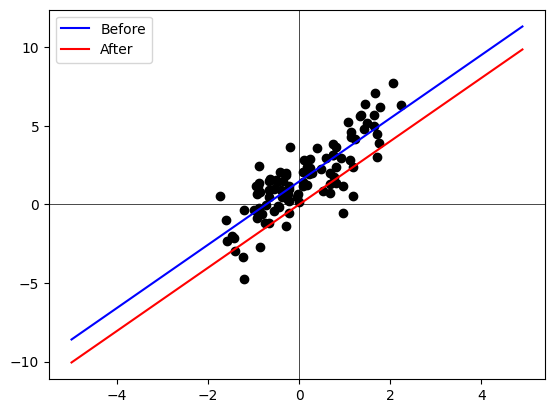

In [3]:
from matplotlib import pyplot as plt
x_seq=np.arange(-5,5,0.1)
y_pre=x_seq*a1+b1
yy_pre=x_seq*a2+b2
plt.scatter(x,y,c="black")
plt.axhline(y=0,c="black",linewidth=0.5)
plt.axvline(x=0,c="black",linewidth=0.5)
plt.plot(x_seq,y_pre,c="blue",label="Before")
plt.plot(x_seq,yy_pre,c="red",label="After")
plt.legend(loc="upper left")

- 线性代数的解释（线性回归的线代思想）
    1. 求解方程组 $\boldsymbol{\beta}$ 为未知数
    $$
    \boldsymbol{X\beta} = \boldsymbol{y}
    $$
    2. 当该方程组无解时，需要寻找最优解使得
    $$
    \min L = \Vert \boldsymbol{y} - \boldsymbol{X\hat{\beta}}\Vert
    $$
    3. 当 $\boldsymbol{y} - \boldsymbol{X\hat{\beta}}$ 与 $\boldsymbol{X}$ 正交时取得最优解，既
    $$
    \boldsymbol{X}^{\text{T}}(\boldsymbol{y} - \boldsymbol{X \hat{\beta}}) = \boldsymbol{0}
    $$
    4. 解得
    $$
    \boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}
    $$


In [4]:
n=100;p=2
beta=np.array([1,2,3])
x=randn(n,2)
y=beta[0]+beta[1]*x[:,0]+beta[2]*x[:,1] + randn(n)
X=np.insert(x,0,1,axis=1)
np.linalg.inv(X.T@X)@X.T@y

array([0.974592  , 2.05065084, 3.1414044 ])

## 2.2 $\boldsymbol{\hat{\beta}}$的分布
- 首先，我们有如下假设 $\boldsymbol{y}, \boldsymbol{\epsilon} \in \mathbb{R}^{N}, \boldsymbol{X}\sim \mathbb{R}^{N\times (p+1)}, \boldsymbol{\beta}\sim \mathbb{R}^{p+1}$
    $$
    \boldsymbol{y} = \boldsymbol{X\beta} + \boldsymbol{\epsilon}
    $$
    1. 其中的 $\boldsymbol{\beta}$ 是未知的，且与 $\boldsymbol{\hat{\beta}}$ 无关，$\boldsymbol{\hat{\beta}}$ 仅为通过最小二乘法估计所得的估计值
    2. $\epsilon_i$ 相互独立，且服从于正态分布 $\epsilon_i\sim \mathcal{N}(0,\sigma^2)$
    3. 故 $\epsilon_1,\cdots,\epsilon_N$ 的联合分布
    $$
    f(\boldsymbol{\epsilon}) = \prod_{i=1}^{N}f_{i}(\epsilon_{i}) = \frac{1}{(2\pi\sigma^{2})^{N/2}}\exp\left\{-\frac{\boldsymbol{\epsilon}^{\text{T}}\boldsymbol{\epsilon}}{2\sigma^{2}}\right\}
    $$
    4. 因此 $\boldsymbol{\epsilon}\sim \mathcal{N}(0, \sigma^{2}\boldsymbol{I})$ ($\boldsymbol{I}$ 为 $N$ 阶单位矩阵 )
        - $E(\boldsymbol{\epsilon\epsilon}^{\text{T}}) = \sigma^{2}\boldsymbol{I}$ 
    5. 将 $\boldsymbol{y} = \boldsymbol{X \beta} + \boldsymbol{\epsilon}$ 带入 $\boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}$ 可得
    $$\begin{split}
    \boldsymbol{\hat{\beta}} & = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}(\boldsymbol{X\beta} + \boldsymbol{\epsilon}) \\
    & = \boldsymbol{\beta} + (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}
    \end{split}$$
    6. 其中，可将 $(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}$ 视为常数，故可得 $\boldsymbol{\hat{\beta}}$ 的期望：
    $$
    E(\boldsymbol{\hat{\beta}}) = \boldsymbol{\beta} + \boldsymbol{0} = \boldsymbol{\beta}
    $$
    7. $\boldsymbol{\hat{\beta}}$ 的协方差矩阵
    $$
    \begin{split}
    E& 
    \left[
    \begin{matrix}
      (\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0})^{2} & (\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0})(\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1}) &\cdots &(\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0})(\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})\\
    (\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1})(\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0}) & (\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1})^{2} & \cdots & (\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1})(\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})\\
    \vdots &\vdots &\ddots & \vdots \\
    (\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})(\boldsymbol{\hat{\beta}}_{0} - \boldsymbol{\beta}_{0}) & (\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})(\boldsymbol{\hat{\beta}}_{1} - \boldsymbol{\beta}_{1}) & \cdots & (\boldsymbol{\hat{\beta}}_{p} - \boldsymbol{\beta}_{p})^{2}\\
    \end{matrix}
    \right]\\
    &= E(\boldsymbol{\hat{\beta}}-\boldsymbol{\beta})(\boldsymbol{\hat{\beta}-\boldsymbol{\beta}})^{\text{T}} = E(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}\{(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}\}^{\text{T}} \\
    & \xlongequal{E (\boldsymbol{\epsilon\epsilon}^{\text{T}}) = \sigma^{2}\boldsymbol{I}} \sigma^{2}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}
    \end{split}
    $$
    8. 因此
    $$
    \boldsymbol{\hat{\beta}} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^{2}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1})
    $$
    
    
    
    


## 2.3 $\text{RSS}$值的分布 
- **Hat Matrix**
    - **定义** $\boldsymbol{H} \coloneqq \boldsymbol{X}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\in \mathbb{R}^{N\times N}$ 
    - **性质** 
        1. $\boldsymbol{H}^{2} = \boldsymbol{H}$
        2. $(\boldsymbol{I} -\boldsymbol{H})^{2} = \boldsymbol{I} - \boldsymbol{H}$
        3. $\boldsymbol{HX} = \boldsymbol{X}$
- 由 $\boldsymbol{\hat{y}} = \boldsymbol{X \hat{\beta}}$ 和 $\boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}$，可得 $\boldsymbol{\hat{y}} = \boldsymbol{Hy}$ 故可得
  $$
  \begin{split}
  \boldsymbol{y} - \boldsymbol{\hat{y}} &= (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{y} = (\boldsymbol{I} - \boldsymbol{H})(\boldsymbol{X\beta} +\boldsymbol{\epsilon})\\
  &= (\boldsymbol{X} - \boldsymbol{HX})\boldsymbol{\beta} + (\boldsymbol{I} - \boldsymbol{H}) \boldsymbol{\epsilon} \\
  & = (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}
  \end{split}
  $$
- $\text{RSS}$的定义
  $$
  \begin{split}
    \text{RSS} &\coloneqq \Vert \boldsymbol{y} - \boldsymbol{\hat{y}}\Vert^{2}  = \{(\boldsymbol{I}-\boldsymbol{H})\boldsymbol{\epsilon}\}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}  \\
    & =\boldsymbol{\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})^{2}\boldsymbol{\epsilon} = \boldsymbol{\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}
  \end{split}
  $$
- **命题 13**: $\boldsymbol{H}$ 和 $\boldsymbol{I}- \boldsymbol{H}$ 的特征值仅可能为 $0$ 或 $1$，且 $1$ 和 $0$ 分别为 $\boldsymbol{H}$ 和 $\boldsymbol{I} - \boldsymbol{H}$ 的 $p+1$ 重特征值，因此 $0$ 和 $1$ 分别为$\boldsymbol{H}$ 和 $\boldsymbol{I} - \boldsymbol{H}$ 的 $N-p-1$ 重特征值
- 由于 $\boldsymbol{H}$ 和 $\boldsymbol{I} - \boldsymbol{H}$ 为实对称矩阵，故存在正交阵 $\boldsymbol{P}\in \mathbb{R}^{N\times N}$ 可将二者对角化
  $$
  \boldsymbol{P}(\boldsymbol{I} - \boldsymbol{H}) \boldsymbol{P}^{\text{T}} = \text{diag}(
  \underbrace{1,\cdots,1}_{N-p-1},\underbrace{0,\cdots,0}_{p+1})
  $$
- 定义 $\boldsymbol{v} \coloneqq \boldsymbol{P\epsilon}\in \mathbb{R}^{N}\Rightarrow \boldsymbol{\epsilon} = \boldsymbol{P}^{\text{T}}\boldsymbol{v}$ 可得
    $$
    \begin{split}
    \text{RSS} &= \boldsymbol{\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon} = (\boldsymbol{P}^{\text{T}}\boldsymbol{v})^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{P}^{\text{T}}\boldsymbol{v}\\
    &=\boldsymbol{v}^{\text{T}}\boldsymbol{P}^{}(\boldsymbol{I-\boldsymbol{H}})\boldsymbol{P}^{\text{T}}\boldsymbol{v} \\
    & = 
    \begin{bmatrix}
      v_{1} & \cdots& v_{N-p-1} & v_{N-p} & \cdots & v_{n}
    \end{bmatrix}
    \begin{bmatrix}
      1 & 0 & \cdots & \cdots & \cdots & 0 \\
      0 & \ddots & 0 & \cdots & \cdots & \vdots \\
      \vdots & 0 & 1 & 0 & \cdots & 0 \\
      \vdots & \vdots & 0 & 0 & \cdots & \vdots \\
      \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
      0 & \cdots & 0 & \cdots & \cdots & 0 \\
    \end{bmatrix}
    \begin{bmatrix}
      v_{1} \\ \vdots\\ v_{N-p-1} \\ v_{N-p} \\ \vdots \\ v_{n}
    \end{bmatrix} \\
    & = \sum_{i=1}^{N-p-1} v_{i}^{2}
    \end{split}
    $$
  - $\boldsymbol{v} = \boldsymbol{P\epsilon}\Rightarrow E(\boldsymbol{v}) = E(\boldsymbol{P\epsilon}) = 0$
  - $E(\boldsymbol{vv}^{\text{T}}) = E(\boldsymbol{P\epsilon}(\boldsymbol{P\epsilon})^{\text{T}}) =  \boldsymbol{P}E(\boldsymbol{\epsilon\epsilon}^{\text{T}})\boldsymbol{P^{\text{T}}} = \sigma^{2}\boldsymbol{\tilde{I}}, \quad\boldsymbol{\tilde{I}}=\text{diag}(\underbrace{1,\cdots,1}_{N-p-1},\underbrace{0,\cdots,0}_{p+1})$
  - 因此，可得 $\text{RSS}/\sigma^{2}$ 的分布
  $$
  \frac{\text{RSS}}{\sigma^{2}} \sim \chi^{2}_{N-p-1}
  $$

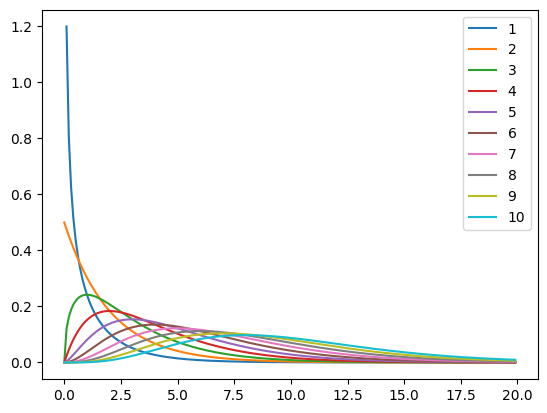

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
x = np.arange(0, 20, 0.1)
for i in range(1, 11):
    plt.plot(x, stats.chi2.pdf(x, i), label='{}'.format(i))
plt.legend(loc='upper right')


## 2.4 对 $\boldsymbol{\hat{\beta}}_j\ne 0$ 的假设检验
### 2.4.1 $\sigma$ 的估计值 $\hat{\sigma}$

Text(0.5, 1.0, 'changes of t distribution by degree of freedom')

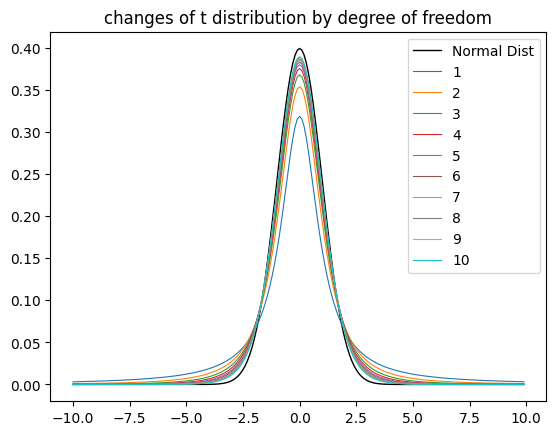

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.arange(-10, 10, 0.1)
plt.plot(x, stats.norm.pdf(x, 0, 1),
         label="Normal Dist", c="black", linewidth=1)

for i in range(1, 11):
    plt.plot(x, stats.t.pdf(x, i), label='{}'.format(i), linewidth=0.8)
plt.legend(loc='upper right')
plt.title("changes of t distribution by degree of freedom")


Text(0, 0.5, 'beta_1')

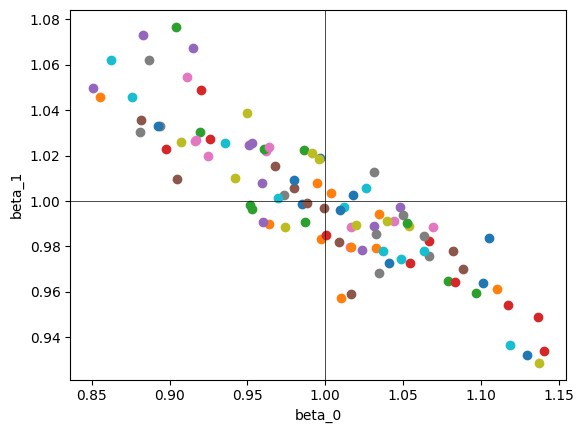

In [7]:
N = 1000
p = 1
iter_num = 100
for i in range(iter_num):
    x = randn(N)+2
    e = randn(N)
    y = x+1+e
    b_1, b_0 = min_sq(x, y)
    plt.scatter(b_0, b_1)

plt.axhline(y=1.0, c="black", linewidth=0.5)
plt.axvline(x=1.0, c="black", linewidth=0.5)
plt.xlabel('beta_0')
plt.ylabel('beta_1')


In [8]:
x = randn(N)+2
e = rand(N)
y = x+1+e
b_1, b_0 = min_sq(x, y)
print(b_1,b_0)

1.0044188584120965 1.4869799772063539


## 2.4 对 $\boldsymbol{\hat{\beta}}_j\ne 0$ 的假设检验
### 2.4.1 $\sigma$ 的估计值 $\hat{\sigma}$
$$
\hat{\sigma} = \sqrt{\frac{\text{RSS}}{N-p-1}}
$$

### 2.4.2 $\hat{\beta}_{j}$ 的标准差
$$
SE(\hat{\beta}_{j}) = \hat{\sigma}\sqrt{\boldsymbol{B}_{j}}
$$
- $\boldsymbol{B}_{j}$ 为 $(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}$ 第 $j$ 个对角元素

### 2.4.3 $t$分布
- $t$ 分布结论
  $$
  t = \frac{\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}}{SE(\boldsymbol{\hat{\beta}}_{j})} = \frac{\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}}{\hat{\sigma}\sqrt{\boldsymbol{B}_{j}}} = \frac{\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}}{\sqrt{\text{RSS}/(N-p-1)}\sqrt{\boldsymbol{B}_{j}}}  \sim t_{N-p-1}
  $$
- $t$ 分布证明
  $$
  \begin{array}{ll}
    \because & \boldsymbol{\hat{\beta}} \sim \mathcal{N}(\boldsymbol{\beta}, \sigma^{2}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}) \\
    \therefore & \boldsymbol{\hat{\beta}}_{j} \sim \mathcal{N}(\boldsymbol{\beta}_{j},\sigma^{2}\boldsymbol{B}_{j})\\
    & U\coloneqq\displaystyle \frac{\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}}{\sigma\sqrt{\boldsymbol{B}_{j}}} \sim \mathcal{N}(0,1) \\
    \because & V\coloneqq\text{RSS}/\sigma^{2} \sim \chi^{2}_{N-p-1} \\
    \therefore & \displaystyle \frac{\boldsymbol{\hat{\beta}}_{j}-\boldsymbol{\beta}_{j}}{\sigma \sqrt{\boldsymbol{B}_{j}}}/\sqrt{\frac{\text{RSS}/\sigma^{2}}{N-p-1}} = \frac{U}{\sqrt{V/( N-p-1 )}} = \frac{\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}}{\hat{\sigma}\sqrt{\boldsymbol{B}_{j}}} \sim t_{N-p-1} \\
  \end{array}
  $$
- $U,V$ 独立性证明 
    - 欲证明 $U,V$ 的独立性，就需要看二者的协方差矩阵，由于 $U$ 的变异来源于 $\boldsymbol{\hat{\beta}}_{j} - \boldsymbol{\beta}_{j}$，$V(\text{RSS})$ 的变异来源于 $\boldsymbol{\hat{y}} - \boldsymbol{y}$ 故仅用查看 $E(\boldsymbol{\hat{\beta}} - \boldsymbol{\beta})(\boldsymbol{\hat{y}}-\boldsymbol{y})^{\text{T}}$ 
    $$
    \begin{array}{ll}
      \because & \begin{cases}
        \boldsymbol{\hat{\beta}} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{y}	\\
        \boldsymbol{y} = \boldsymbol{X\beta} +\boldsymbol{\epsilon} \\
        \boldsymbol{\hat{y}} = \boldsymbol{X \hat{\beta}}
      \end{cases} \Rightarrow \begin{cases}
        \boldsymbol{\hat{y}} - \boldsymbol{y} = (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}	\\
        \boldsymbol{\hat{\beta}} - \boldsymbol{\beta} = (\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon}
      \end{cases} \\
      \therefore & 
      E(\boldsymbol{\hat{\beta}} - \boldsymbol{\beta})(\boldsymbol{\hat{y}}-\boldsymbol{y})^{\text{T}} = E(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{X}^{\text{T}}\boldsymbol{\epsilon\epsilon}^{\text{T}}(\boldsymbol{I} - \boldsymbol{H})^{\text{T}}  \\
      & = \sigma^{2}(\boldsymbol{X}^{\text{T}} \boldsymbol{X})^{-1}[(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{X}]^{\text{T}} \\
      & = \boldsymbol{0}
    \end{array}
    $$
    - 故 $U,V$ 二者相互独立


In [9]:
N=100
x=randn(N); y=randn(N)
beta_1,beta_0=min_sq(x,y)
RSS=np.linalg.norm(y-beta_0-beta_1*x)**2
RSE=np.sqrt(RSS/(N-1-1))
B_0=(x.T@x/N)/np.linalg.norm(x-np.mean(x)) ** 2
B_1=1/np.linalg.norm(x-np.mean(x)) ** 2
se_0=RSE*np.sqrt(B_0)
se_1=RSE*np.sqrt(B_1)
t_0=beta_0/se_0
t_1=beta_1/se_1
p_0=2*(1-stats.t.cdf(np.abs(t_0), N-2))
p_1=2*(1-stats.t.cdf(np.abs(t_1), N-2))

In [10]:
beta_0,se_0,t_0,p_0

(-0.007957470978220629,
 0.09487868063650683,
 -0.08386995819120616,
 0.9333309107759147)

In [11]:
beta_1,se_1,t_1,p_1

(-0.0711261854247815,
 0.07797060490009639,
 -0.9122179508022974,
 0.36389258621954745)

### Appendix Compare with Julia

In [12]:
import pandas as pd
df = pd.read_csv("../data/linearRegression.csv")
x = df['x'].values; y = df['y'].values;
N = len(x)


beta_1,beta_0=min_sq(x,y)
RSS=np.linalg.norm(y-beta_0-beta_1*x)**2
RSE=np.sqrt(RSS/(N-1-1))
B_0=(x.T@x/N)/np.linalg.norm(x-np.mean(x)) ** 2
B_1=1/np.linalg.norm(x-np.mean(x)) ** 2
se_0=RSE*np.sqrt(B_0)
se_1=RSE*np.sqrt(B_1)
t_0=beta_0/se_0
t_1=beta_1/se_1
p_0=2*(1-stats.t.cdf(np.abs(t_0), N-2))
p_1=2*(1-stats.t.cdf(np.abs(t_1), N-2))


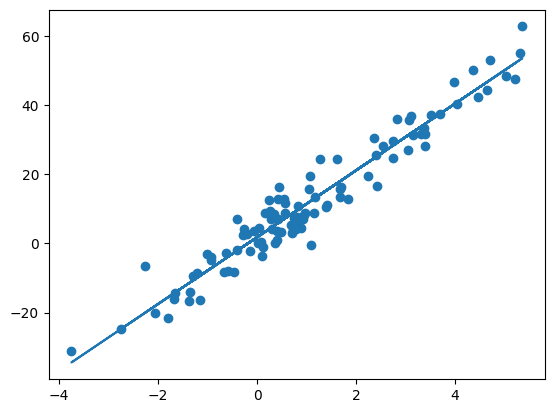

In [13]:
plt.scatter(x,y)
plt.plot(x,beta_1 * x + beta_0)

### `scikit-learn`

In [14]:
N = 100
x = randn(n)
y = randn(N)


In [15]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
reg.fit(x, y)


LinearRegression()

In [16]:
reg.coef_, reg.intercept_

(array([[-0.08455857]]), array([0.03248254]))

In [17]:
import statsmodels.api as sm

X = np.insert(x, 0, 1, axis=1)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6844
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.410
Time:                        22:08:34   Log-Likelihood:                -135.72
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0325      0.095      0.342      0.7

Text(0, 0.5, 'probability density')

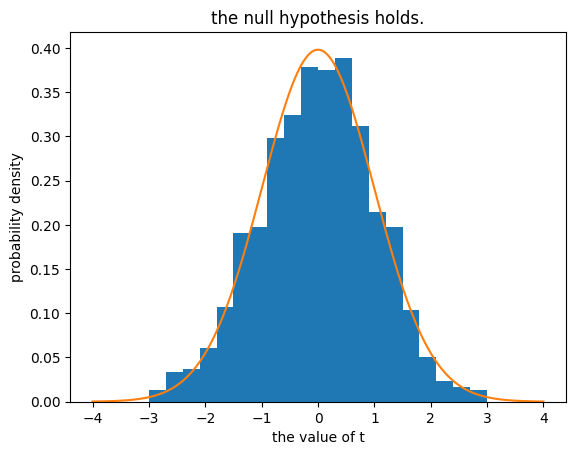

In [18]:
N = 100
r = 1000
T = []
for i in range(r):
    x = randn(N)
    y = randn(N)
    beta_1, beta_0 = min_sq(x, y)
    pre_y = beta_0+beta_1*x
    RSS = np.linalg.norm(y-beta_0 - beta_1*x)**2
    RSE = np.sqrt(RSS/(N-1-1))
    B_0 = (x.T@x/N)/np.linalg.norm(x-np.mean(x))**2
    B_1 = 1/np.linalg.norm(x-np.mean(x))**2
    se_1 = RSE*np.sqrt(B_1)
    T.append(beta_1/se_1)

plt.hist(T, bins=20, range=(-3, 3), density=True)
x = np.linspace(-4, 4, 400)
plt.plot(x, stats.t.pdf(x, 98))
plt.title("the null hypothesis holds.")
plt.xlabel("the value of t")
plt.ylabel("probability density")


## 2.5 决定系数与多重共线性的判断
### 2.5.1 决定系数 $R^2$
- $\boldsymbol{W} \in \mathbb{R}^{N\times N}$  为元素均为 $1/N$ 的方阵，因此，有 $\boldsymbol{Wy}\in \mathbb{R}^{N},\quad \boldsymbol{\bar{y}} = \boldsymbol{Wy}$ 
- 残差平方和($\text{RSS}$)，被解释的平方和($ESS$)与总平方和($TSS$)
    - $\displaystyle \text{RSS} = \Vert \boldsymbol{\hat{y}} - \boldsymbol{y}\Vert^{2} = \Vert (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}\Vert^{2} =\Vert (\boldsymbol{I} - \boldsymbol{H})\boldsymbol{y}\Vert^{2}$ 
    - $\displaystyle \text{ESS} \coloneqq \Vert \boldsymbol{\hat{y}} - \boldsymbol{\bar{y}} \Vert^{2}  = \Vert \boldsymbol{\hat{y}} - \boldsymbol{Wy}\Vert^{2} = \Vert (\boldsymbol{H} - \boldsymbol{W})\boldsymbol{y}\Vert^{2}$
    - $\displaystyle \text{TSS}\coloneqq \Vert \boldsymbol{y} - \boldsymbol{\bar{y}}\Vert^{2} = \Vert(\boldsymbol{I}- \boldsymbol{W})\boldsymbol{y}\Vert^{2}$ 
    - 三者关系
      $$
      \text{TSS} = \text{ESS} + \text{RSS}
      $$
- $\text{ESS}$ 与 $\text{RSS}$ 的独立性证明
    - 欲证二者独立，则需计算二者的协方差矩阵，既 $(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{y}$ 与 $(\boldsymbol{H} - \boldsymbol{W})\boldsymbol{y}$ 的协方差矩阵为 $\boldsymbol{0}$ ，因为 $\boldsymbol{y} = \boldsymbol{X\beta} + \boldsymbol{\epsilon}$，所以，二者的变异分别可表示为 $(\boldsymbol{I}-\boldsymbol{H})\boldsymbol{\epsilon}$ 和 $(\boldsymbol{H} - \boldsymbol{W})\boldsymbol{\epsilon}$，因此，二者的协方差矩阵
    $$
    \begin{split}
    E(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon}[(\boldsymbol{H} - \boldsymbol{W})\boldsymbol{\epsilon}]^{\text{T}} &\xlongequal{\boldsymbol{W}^{\text{T}}=\boldsymbol{W}} E(\boldsymbol{I} - \boldsymbol{H})\boldsymbol{\epsilon\epsilon}^{\text{T}}(\boldsymbol{H} - \boldsymbol{W})\\
    & = \sigma^{2}(\boldsymbol{I} - \boldsymbol{H})(\boldsymbol{H} -\boldsymbol{W}) \\
    & \xlongequal{\boldsymbol{HW} = \boldsymbol{W}} \boldsymbol{0}
    \end{split}
    $$
- 决定系数 $R^{2}$ 
    $$
    R^{2} = \frac{\text{ESS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}
    $$
    - $R^{2}$ 与 相关系数 $\hat{\rho}$ (一元回归)
    - 由 $\hat{y} - \bar{y} = \hat{\beta}_{1}(x - \bar{x})$，可得
        - $\Vert \boldsymbol{\hat{y}} - \boldsymbol{\bar{y}}\Vert^{2} = \hat{\beta}_{1}^{2}\Vert \boldsymbol{x} - \boldsymbol{\bar{x}}\Vert^{2}$，因此
        $$
        \begin{split}
          \frac{\text{ESS}}{\text{TSS}} & = \frac{\Vert \boldsymbol{\hat{y}} - \boldsymbol{\bar{y}} \Vert^{2}}{\Vert \boldsymbol{y} - \boldsymbol{\bar{y}} \Vert^{2}} = \frac{\hat{\beta}_{1}^{2}\Vert \boldsymbol{x} - \boldsymbol{\bar{x}} \Vert^{2}}{\Vert \boldsymbol{y} - \boldsymbol{\bar{y}} \Vert^{2}} = \left\{\frac{\displaystyle \sum_{i=1}^{N}(x_{i} - \bar{x})(y_{i}-\bar{y})}{\displaystyle \sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}\right\}\frac{\displaystyle \sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}{\displaystyle \sum_{i=1}^{N}(y_{i} - \bar{y})^{2}} \\
          & = \left\{\frac{\displaystyle \sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\displaystyle \sqrt{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}\sum_{i=1}^{N}(y_{i}-\bar{y})^{2}}}\right\}^{2} = \hat{\rho}^{2}
        \end{split}
        $$
- 经调整的决定系数
    $$
    1 - \frac{\text{RSS}/(N-p-1)}{\text{TSS}/(N-1)}
    $$
    - 对于简单地决定系数，协变量越多，$R^{2}$ 越大，但调整的决定系数，会对不必要协变量的引入进行“惩罚”

In [19]:
def R2(x, y):
    n = x.shape[0]
    xx = np.insert(x, 0, 1, axis=1)
    beta = np.linalg.inv(xx.T@xx)@xx.T@y
    y_hat = xx@beta
    y_bar = np.mean(y)
    RSS = np.linalg.norm(y-y_hat) ** 2
    TSS = np.linalg.norm(y-y_bar) ** 2
    return 1 - RSS/TSS


In [20]:
import pandas as pd
df = pd.read_csv("../data/linearRegression.csv")
x = df['x'].values[:, np.newaxis]
y = df['y'].values
N = len(x)

R2(x, y)
# np.insert(x[:,np.newaxis],0,1,axis=1)


0.9364779521605536

In [21]:
import statsmodels.api as sm

X = np.insert(x, 0, 1, axis=1)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1445.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.83e-60
Time:                        22:08:35   Log-Likelihood:                -298.61
No. Observations:                 100   AIC:                             601.2
Df Residuals:                      98   BIC:                             606.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7866      0.553      3.229      0.0

### 2.5.2 多重共线性的判断 $\text{VIF}$
- 方差膨胀因子 (Variance inflation factors, VIF)
    - 用于衡量每个协变量的冗余性，当其他变量出现时
        $$
        \text{VIF}\coloneqq \frac{1}{1-R^2_{\boldsymbol{X}_j\vert \boldsymbol{X}_{-j}}}
        $$
        - $R^2_{\boldsymbol{X}_j\vert\boldsymbol{X}_{-j}}$ 表示第 $j$ 个变量为因变量，其余变量为自变量，进行线性回归的 $R^2$
    - VIF 越大，说明该变量越冗余，也说明多重共线性越强

In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
x = boston.data
x.shape


/home/zpp/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

(506, 13)

In [23]:
def VIF(x):
    p = x.shape[1]
    values = []
    for j in range(p):
        S = list(set(range(p))-{j})
        values.append(1/(1-R2(x[:, S], x[:, j])))
    return values


In [24]:
%timeit VIF(x)


4.13 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 2.6 置信区间与区间估计
> 此部分主要关于对于给一组新数据 $\boldsymbol{x}_{*}$ 对 $\boldsymbol{x}_{*}\boldsymbol{\beta}$ 及 $\boldsymbol{y}_{*} = \boldsymbol{x}_{*}\boldsymbol{\beta} + \boldsymbol{\epsilon}$ 进行区间估计
- 对 $\boldsymbol{\beta}_{i}$ 的区间估计
  $$
  \boldsymbol{\beta}_{i} = \boldsymbol{\hat{\beta}}_{i} \pm t_{N-p-1}(\alpha/2)SE(\boldsymbol{\hat{\beta}}_{i})
  $$
- 在此部分，我们希望得到 $\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}$ 的置信区间，其中 $\boldsymbol{x}_{*}\in \mathbb{R}^{p+1}$ 且为第一个元素为 $1$ 的行向量，且于用于估计的 $\boldsymbol{x}_{1},\cdots, \boldsymbol{x}_{N}$ 不同
    - $E[\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}] = \boldsymbol{x}_{*}E[\boldsymbol{\hat{\beta}}]$ 
    - $D[\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}] = \boldsymbol{x}_{*}D(\boldsymbol{\hat{\beta}})\boldsymbol{x}_{*}^{\text{T}} = \sigma^{2}\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}$ 
    - 此处 $\sigma$ 的估计值 $\hat{\sigma} \coloneqq \sqrt{\text{RSS}/(N-p-1)}$ ，由此可得 
    $$
    SE(\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}) = \hat{\sigma}\sqrt{\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}
    $$
    - $C$ 
    $$
    \begin{split}
    C&\coloneqq \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}-\boldsymbol{x}_{*}\boldsymbol{\beta}}{SE(\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}})} = \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}-\boldsymbol{x}_{*}\boldsymbol{\beta}}{\hat{\sigma} \sqrt{\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}} \\
    & = \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}-\boldsymbol{x}_{*}\boldsymbol{\beta}}{{\sigma} \sqrt{\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}} \bigg/\sqrt{\frac{\text{RSS}}{\sigma^{2}}\big/(N-p-1)} \sim t_{N-p-1}
    \end{split}
    $$
- 基于以上，考虑上 $\boldsymbol{y}_{*} = \boldsymbol{x}_{*}\boldsymbol{\beta}  + \boldsymbol{\epsilon}$，则有
    $$
    \begin{split}
    D[\hat{\boldsymbol{y}}_{*} - \boldsymbol{y}_{*}]&=D[\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} - (\boldsymbol{x}_{*}\boldsymbol{\beta}+\boldsymbol{\epsilon})] = D[\boldsymbol{x}_{*}(\boldsymbol{\hat{\beta}} - \boldsymbol{\beta})] + D[\boldsymbol{\epsilon}] \\
    & = \sigma^{2}\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}} + \sigma^{2}\boldsymbol{I}
    \end{split}
    $$
    - 类似以上可得 $P$ 
        $$
        \begin{split}
          P &\coloneqq \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} - \boldsymbol{y}_{*}}{SE(\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}}- \boldsymbol{y}_{*})} = \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} - \boldsymbol{y}_{*}}{\hat{\sigma}\sqrt{1 + \boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}} \\
          & = \frac{\boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} - \boldsymbol{y}_{*}}{\sigma\sqrt{1 + \boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}}\bigg/\sqrt{\frac{\text{RSS}}{\sigma^{2}}\big/(N-p-1)} \sim t_{N-p-1}
        \end{split}
        $$
- 基于以上，可得出 $\boldsymbol{x}_{*}\boldsymbol{\beta}$ 和 $\boldsymbol{y}_{*}$ 的区间估计
$$
\begin{split}
  \boldsymbol{x}_{*}\boldsymbol{\beta} & = \boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} \pm t_{N-p-1}(\alpha/2)\hat{\sigma}\sqrt{\boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}} \\
  \boldsymbol{y}_{*} & = \boldsymbol{x}_{*}\boldsymbol{\hat{\beta}} \pm t_{N-p-1}(\alpha/2)\hat{\sigma}\sqrt{1 + \boldsymbol{x}_{*}(\boldsymbol{X}^{\text{T}}\boldsymbol{X})^{-1}\boldsymbol{x}_{*}^{\text{T}}}
\end{split}
$$

In [25]:
N=100; p=1;
x=randn(N,p)
X = np.insert(x,0,1,axis=1)
beta=np.array([1,1])
epsilon = randn(N)
y=X@beta + epsilon

In [26]:
U = np.linalg.inv(X.T@X)
beta_hat = U@X.T@y
RSS = np.linalg.norm(y - X@beta_hat) ** 2
RSE = np.sqrt(RSS/(N-p-1))
alpha = 0.5

In [27]:
def f(x,a):
    x = np.array([1,x])
    range=stats.t.ppf(0.975, df=N-p-1)*RSE*np.sqrt(a + x@U@x.T)
    lower = x@beta_hat - range;
    upper = x@beta_hat + range;
    return ([lower, upper])

In [28]:
stats.t.ppf(0.975,df=1)

12.706204736432095

In [29]:
x_seq = np.arange(-10,10,0.1)
low_seq1=[]; upper_seq1=[]
for i in range(len(x_seq)):
    low_seq1.append(f(x_seq[i],0)[0]);
    upper_seq1.append(f(x_seq[i],0)[1])

low_seq2=[]; upper_seq2=[]
for i in range(len(x_seq)):
    low_seq2.append(f(x_seq[i],1)[0]);
    upper_seq2.append(f(x_seq[i],1)[1])

yy = beta_hat[0] + beta_hat[1] * x_seq


Text(0, 0.5, 'y')

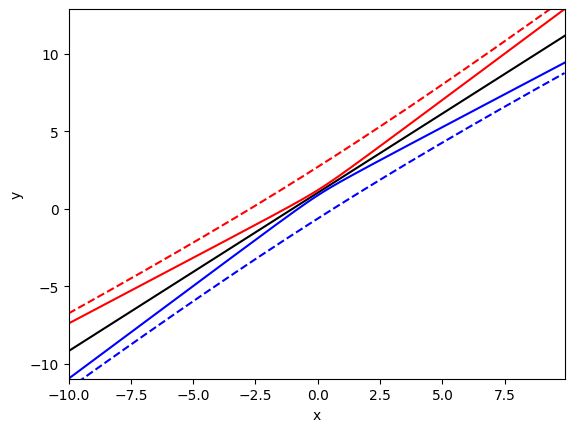

In [30]:
plt.xlim(np.min(x_seq),np.max(x_seq))
plt.ylim(np.min(low_seq1),np.max(upper_seq1))
plt.plot(x_seq, yy, c="black")
plt.plot(x_seq, low_seq1, c="blue")
plt.plot(x_seq, upper_seq1, c="red")
plt.plot(x_seq, low_seq2, c="blue", ls="dashed")
plt.plot(x_seq, upper_seq2, c="red", ls="dashed")
plt.xlabel("x")
plt.ylabel("y")